# Is Sea Level Correlated with Sea Ice Extent?

Here are the libraries used:

In [95]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

## Load, Clean, and Merge the Datasets

We first load and clean the sea level data, and calculate the mean sea level from four satellite sources `TOPEX/Poseidon`, `Jason-1`, `Jason-2`, and `Jason-3`. The dataset is from NOAA STAR (Center for Satellite Applications and Research): https://www.ncdc.noaa.gov/snow-and-ice/extent/.

In [96]:
# load and clean sea level data, ignore NaNs when calculating mean_sea_level from 4 satellites
sl_df = pd.read_csv('global-sea-level.csv', skiprows=5)
sl_df['year'] = sl_df['year'].astype(int).astype(str)
sl_df = sl_df.groupby('year').mean()
sl_df['mean_sea_level'] = sl_df.mean(axis=1)
sl_df = sl_df.reset_index()
sl_df.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,mean_sea_level
0,1992,-21.250000,NaN,NaN,NaN,-21.250000
1,1993,-15.605882,NaN,NaN,NaN,-15.605882
2,1994,-10.711765,NaN,NaN,NaN,-10.711765
3,1995,-10.571875,NaN,NaN,NaN,-10.571875
4,1996,-5.239394,NaN,NaN,NaN,-5.239394


Next, we load and clean the Northern Hemisphere sea ice extent data. The dataset is from the NCDC (National CLimatic Data Center): https://www.ncdc.noaa.gov/snow-and-ice/extent/.

In [97]:
# load and clean Northern Hemisphere sea ice extent data
sie_df = pd.read_csv('n-hemi-sea-ice-extent.csv', header=None, sep='\n', skiprows=13, skipfooter=1, engine='python')
sie_df = sie_df[0].str.split(',', expand=True)
sie_df.columns = ['year', 'sea_ice_extent', 'sie_anomaly'] # in million sq km
sie_df['sea_ice_extent'] = sie_df['sea_ice_extent'].astype(float)
sie_df['sie_anomaly'] = sie_df['sie_anomaly'].astype(str).str.slice(stop=-1).astype(float)
sie_df.head()

,year,sea_ice_extent,sie_anomaly
0,1979,15.45,0.76
1,1980,15.43,0.74
2,1981,15.01,0.32
3,1982,15.47,0.78
4,1983,15.17,0.48


We then merge the two dataframes: 

In [98]:
# merge dataframes
df = pd.merge(sl_df, sie_df, on='year', how='inner')[['year', 'mean_sea_level', 'sea_ice_extent', 'sie_anomaly']]
df.head() # merged data from 1992 to 2020

,year,mean_sea_level,sea_ice_extent,sie_anomaly
0,1992,-21.250000,14.68,-0.01
1,1993,-15.605882,15.08,0.39
2,1994,-10.711765,14.89,0.20
3,1995,-10.571875,14.45,-0.24
4,1996,-5.239394,14.22,-0.47


## Visualizing the Datasets

Below, we plot the year against mean sea level, sea ice extent, and sea ice extent anomaly:

<IPython.core.display.Javascript object>


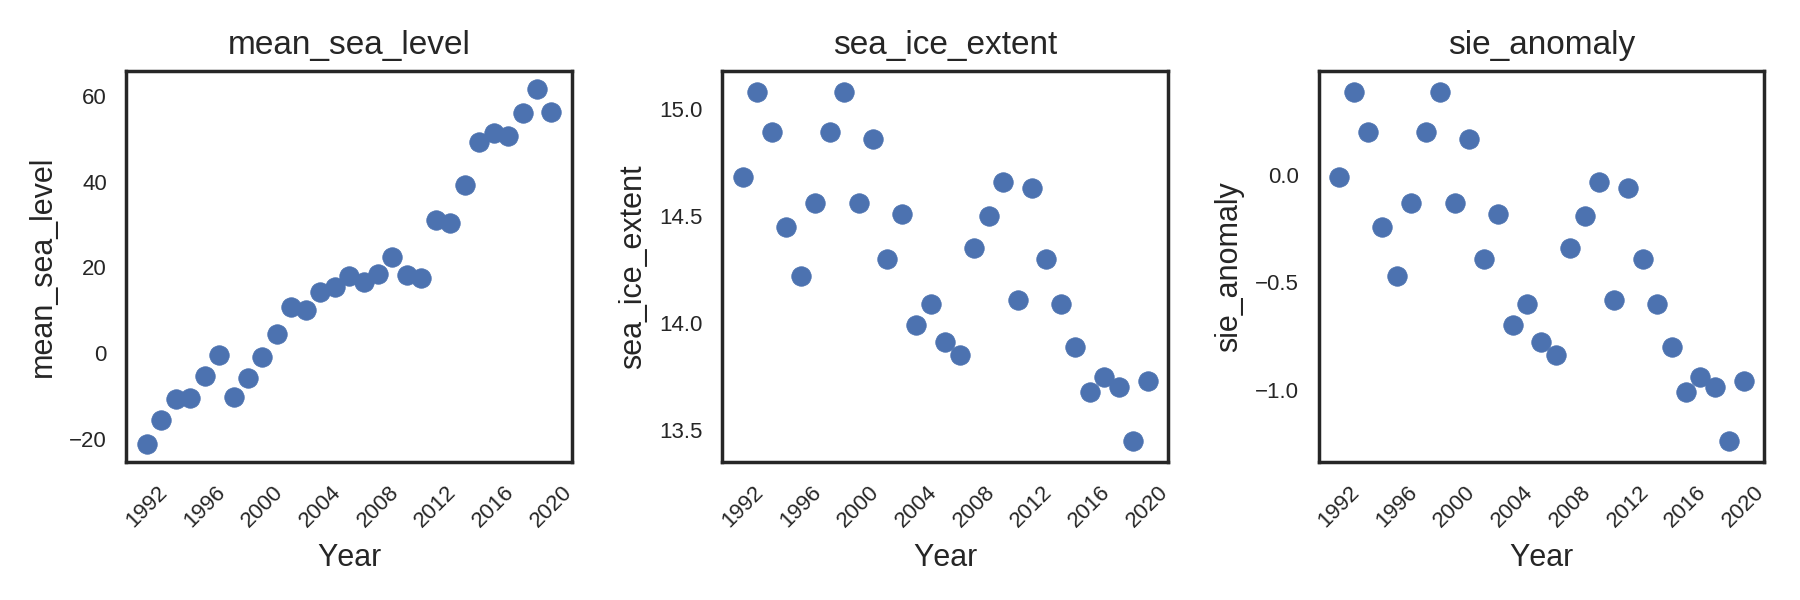

In [153]:
# plot scatterplot of year vs mean_sea_level, sea_ice_extent, and sie_anomaly
fig, axs = plt.subplots(1,3,figsize=(9, 3))
for i in range(len(df.columns)-1):
    axs[i].scatter(df['year'], df[df.columns[i+1]])
    axs[i].set_title(df.columns[i+1])
    axs[i].set_xticks(np.arange(1992, 2024, 4))
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel(df.columns[i+1])
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(45)
        tick.set_fontsize(8)
    for tick in axs[i].get_yticklabels():
        tick.set_fontsize(8)
fig.tight_layout()

## Analysis of the Data and Visualizations 

Below, we plot `mean_sea_level` against `sea_ice_extent`. The Pearson correlation coefficient is `-.81` between the two variables, which is strong. Furthermore, the `p` value is `1e-07`, which is far below the conventional significance level of $\alpha$ = `.05`, which means the Pearson's correlation coefficient is statistically significant. We have statistically significant evidence that sea level is strongly correlated with sea ice extent. There also appears in the visual that there's a strong negative correlation between the two variables

<IPython.core.display.Javascript object>


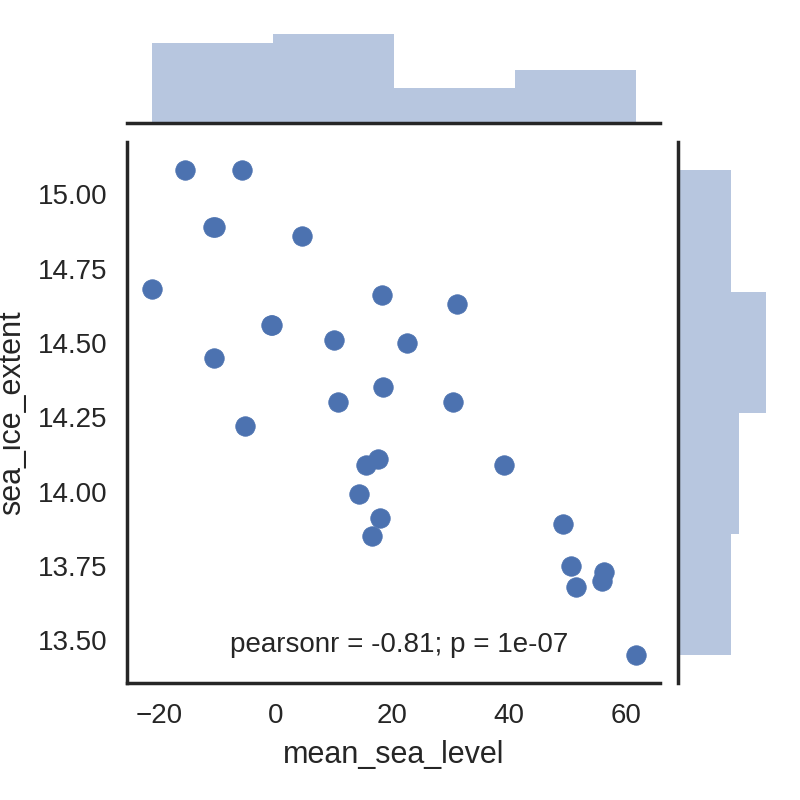

In [152]:
# plot scatter jointplots of mean_sea_level vs sea_ice_extent
sns.jointplot(df['mean_sea_level'], df['sea_ice_extent'], size=4);

We plot the data using a kernel density estimation jointplot below:

<IPython.core.display.Javascript object>


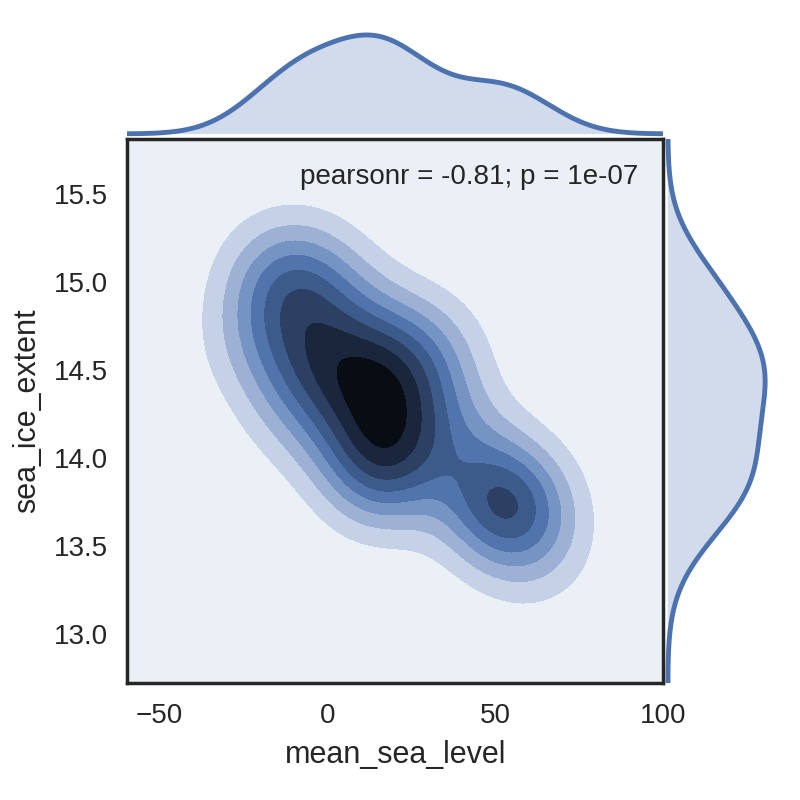

In [154]:
# plot KDE jointplots of mean_sea_level vs sea_ice_extent
sns.jointplot(df['mean_sea_level'], df['sea_ice_extent'], kind='kde', space=0, size=4);